# Short Explanation of Agglomerative Clustering

In this notebook, I would try to explain the Agglomerative Clustering process.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# creating the dummy data
dummy = pd.DataFrame([[30,100,5],
              [18, 200, 2],
              [35, 150, 7],
             [48, 300, 4],
             [50, 200, 6]], index = ['Anne', 'Ben', 'Chad', 'Dave', 'Eric'], columns =['Age', 'Expense($)', 'Distance(KM)'])

dummy

,Age,Expense($),Distance(KM)
Anne,30,100,5
Ben,18,200,2
Chad,35,150,7
Dave,48,300,4
Eric,50,200,6


Agglomerative clustering is based on the distance measurement. In my case, I would use the simplest one which is Euclidean distance. The equation is described below.

$d_{x,y} = \sqrt{\sum_{i=1}^{N}(x_i - y_i)^2}$

If we take an example of the distance between Anne and Ben, it could be written as:

$d_{(Anne,Ben)} =\sqrt{(Anne_{age} - Ben_{age})^2 + (Anne_{Expense} - Ben_{Expense})^2 + (Anne_{Distance} - Ben_{Distance})^2} $

$d_{(Anne,Ben)} = \sqrt{(30-18)^2 + (100-200)^2 + (5-2)^2}$

$d_{(Anne,Ben)} = \sqrt{(12)^2 + (-100)^2 + (3)^2}$

$d_{(Anne,Ben)} = \sqrt{144 + 10000 + 9}$

$d_{(Anne,Ben)} = \sqrt{10153}$

$d_{(Anne,Ben)} = 100.76$

Taking advantage of the scipy module, we could easily create distance function for our data

In [7]:
import numpy as np
from scipy.spatial import distance_matrix
#distance_matrix from scipy.spatial would calculate the distance between data point based on euclidean distance,
#and I round it to 2 decimal

dis = pd.DataFrame(np.round(distance_matrix(dummy.values, dummy.values), 2), index = dummy.index, columns = dummy.index)
dis

,Anne,Ben,Chad,Dave,Eric
Anne,0.00,100.76,50.29,200.81,101.99
Ben,100.76,0.00,53.05,104.42,32.25
Chad,50.29,53.05,0.00,150.59,52.21
Dave,200.81,104.42,150.59,0.00,100.04
Eric,101.99,32.25,52.21,100.04,0.00


By using the Single linkage criterion, we would implement the following equation for the merging event

$D(X,Y) = \underset{x \in X, y \in Y}{\min} d_{x,y}$

$D(Anne,(Ben,Eric)) = \min(Anne, (Ben,Eric))$

$D(Anne,(Ben,Eric)) = \min(dist(Anne,Ben), dist(Anne,Eric))$

$D(Anne,(Ben,Eric)) = \min((100.76, 101.99))$

$D(Anne,(Ben,Eric)) = 100.76$

Next, by using the dendrogram we could visualize the merging event

Text(0.5, 1.0, 'Dendrogram of the Dummy Data')

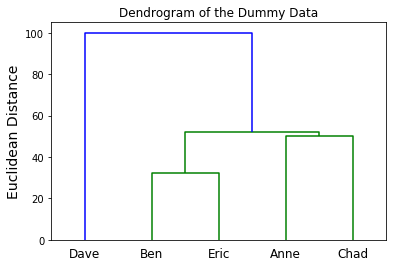

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

den = dendrogram(linkage(dummy, method='single'), labels = dummy.index)
plt.ylabel('Euclidean Distance', fontsize = 14)
plt.title('Dendrogram of the Dummy Data')

In case you want to visualize it for each merging event, I provide how to do it in the code below. I also try to find the cut-off point by eye-rolling the dendrogram.

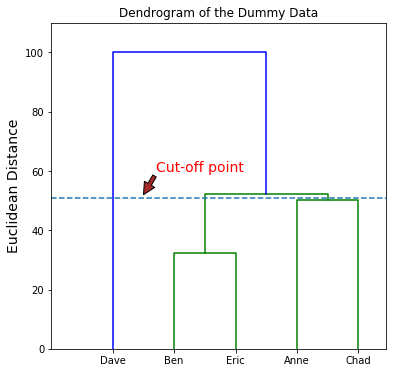

In [10]:
from scipy import array
def plot_tree(P, pos=None):
    plt.figure(figsize = (6,6))
    plt.clf()
    
    icoord = array(P['icoord'])
    dcoord = array(P['dcoord'])
    color_list = array(P['color_list'])
    xmin, xmax = icoord.min(), icoord.max()
    ymin, ymax = dcoord.min(), dcoord.max()
    if pos:
        icoord = icoord[pos]
        dcoord = dcoord[pos]
        color_list = color_list[pos]
    for xs, ys, color in zip(icoord, dcoord, color_list):
        plt.plot(xs, ys, color)
    plt.xlim(xmin-10, xmax + 0.1*abs(xmax))
    plt.ylim(ymin, ymax + 0.1*abs(ymax))
    plt.xticks([5 +(10*i) for i in range(len(P['icoord'])+1)], P['ivl'])
    plt.ylabel('Euclidean Distance', fontsize = 14)
    plt.title('Dendrogram of the Dummy Data')
    #change the cut-off point here
    plt.axhline(y = 51, ls = '--')
    plt.annotate('Cut-off point', (10,52), xytext=(12,60),
                 arrowprops = dict(facecolor = 'brown'), fontsize = 14 , color = 'red')
    plt.show()
    
#change the range value to get different merging event
plot_tree(den, pos = range(4))


We could now use the Agglomerative Clustering to cluster our dummy data. In my case, I would try to grouping the data by 3 cluster.

In [11]:
aglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
aglo.fit_predict(dummy)
dummy['Aglo-label'] = aglo.fit_predict(dummy)
dummy

,Age,Expense($),Distance(KM),Aglo-label
Anne,30,100,5,0
Ben,18,200,2,2
Chad,35,150,7,0
Dave,48,300,4,1
Eric,50,200,6,2


That's it, we now have obtain our clustered data and ready to be analyzed